In [1]:
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': []
}

visited = set()  # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):
    # function for dfs
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search:")
dfs(visited, graph, '5')


Following is the Depth-First Search:
5
3
2
4
8
7


Following is the Depth-First Search


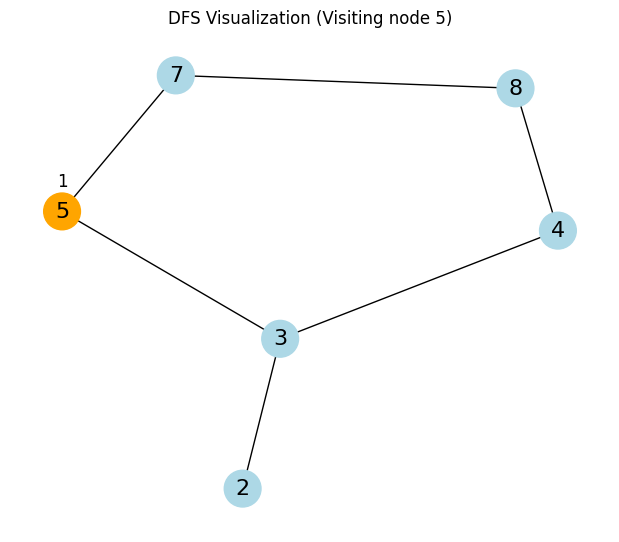

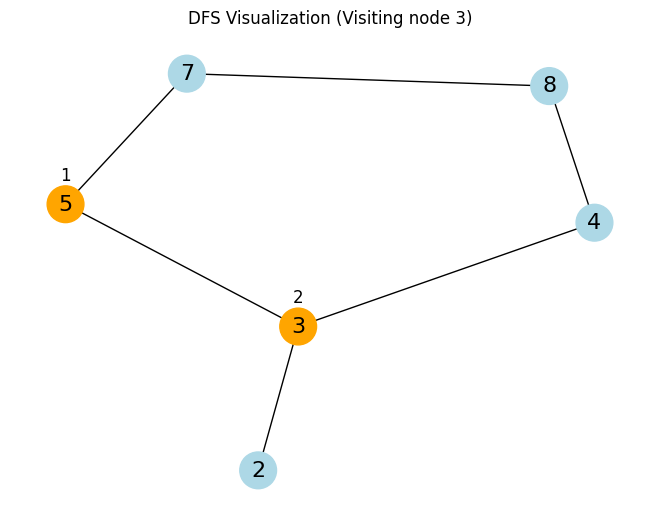

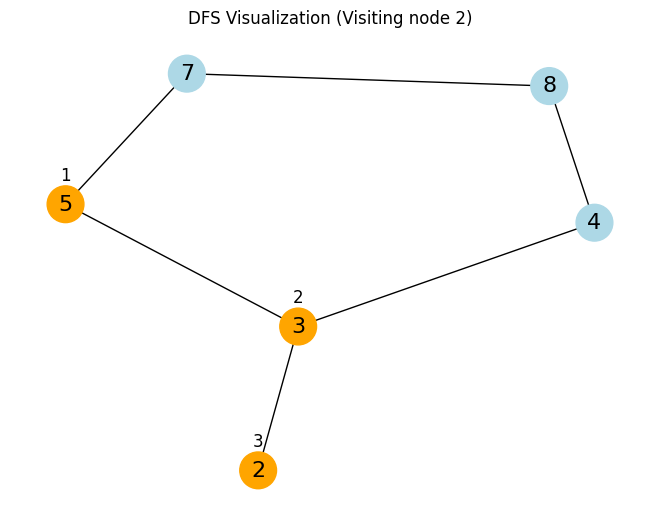

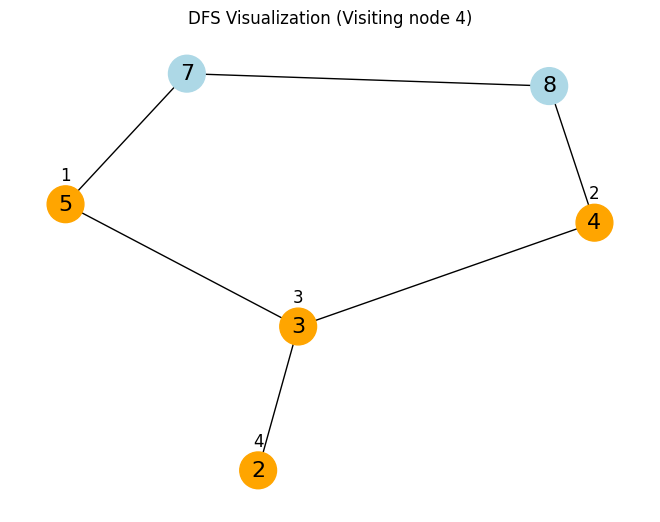

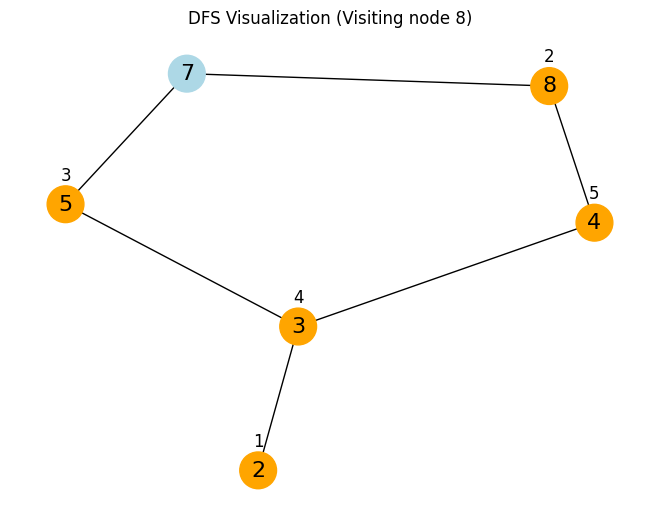

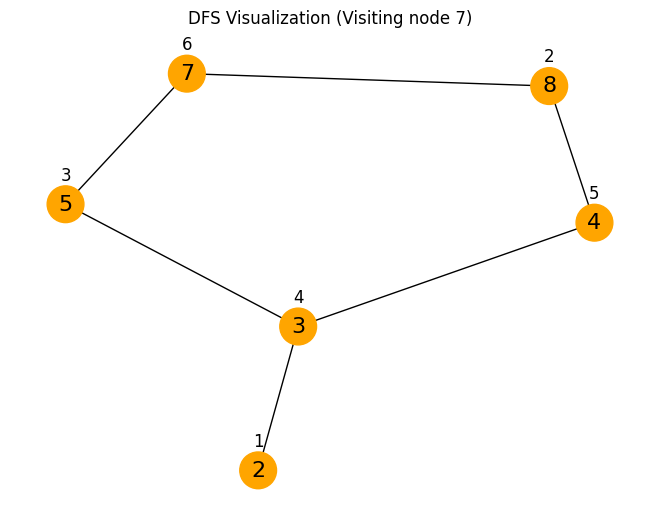


Path: 5 -> 3 -> 2 -> 4 -> 8 -> 7

DFS Traversal Steps:
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
+====+================+===============+=========+===================+=====+=====+=====+=====+=====+=====+
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|  1 |              3 |             5 | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+-----+-----+
|  2 |              2 |             3 | 7 4     | 5 3 2             |   3 | 3   | -   | 3   | -   | -   |
+----+----------------+---------------+---------+-------------------+-----+-----+-----+-----+---

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from tabulate import tabulate

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def dfs_visualization(graph, start):
    visited = set()  # Set for visited nodes
    stack = [(start, None)]  # Initialize a stack with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while stack:  # Loop to visit each node
        current_node, parent_node = stack.pop()
        if current_node not in visited:
            visited.add(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(list(visited).index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"DFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'STACK': ' '.join([node for node, _ in stack]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            # Push unvisited neighbours onto the stack
            for neighbour in reversed(graph[current_node]):
                if neighbour not in visited:
                    stack.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nDFS Traversal Steps:")
    print(tabulate(df, headers='keys', tablefmt='grid'))

    plt.show()

# Driver Code
print("Following is the Depth-First Search")
dfs_visualization(graph, '5')  # Function calling


Following is the Depth-First Search


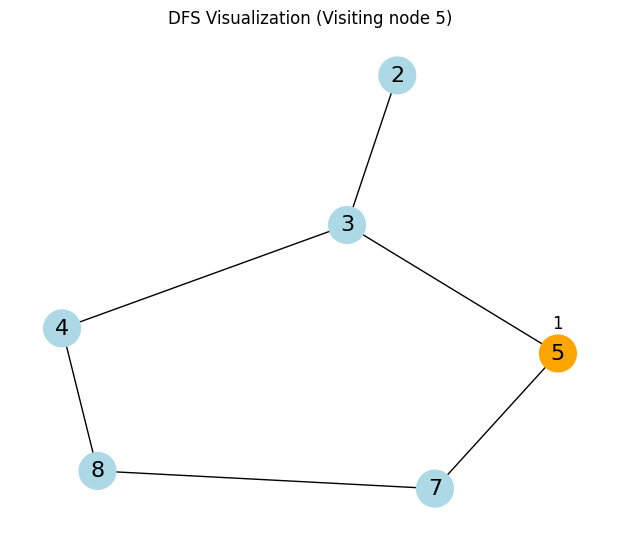

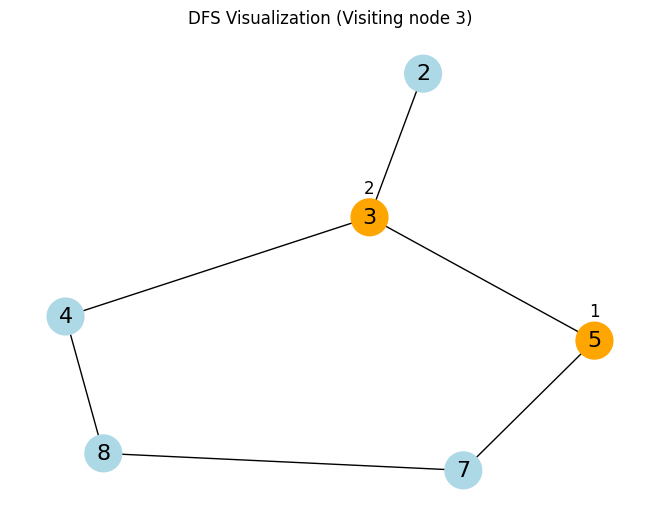

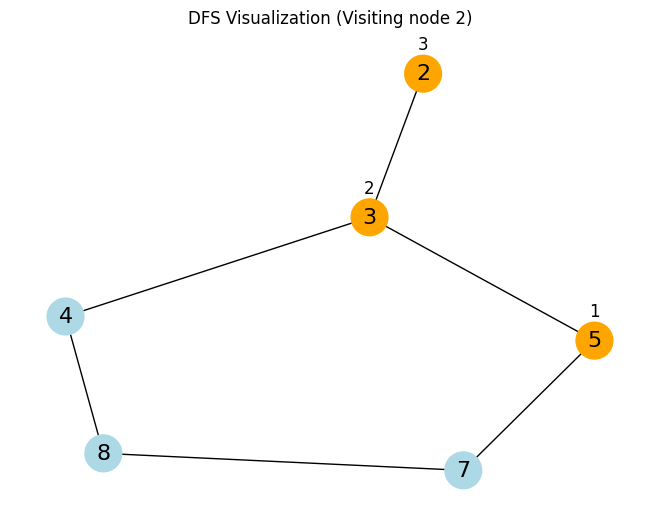

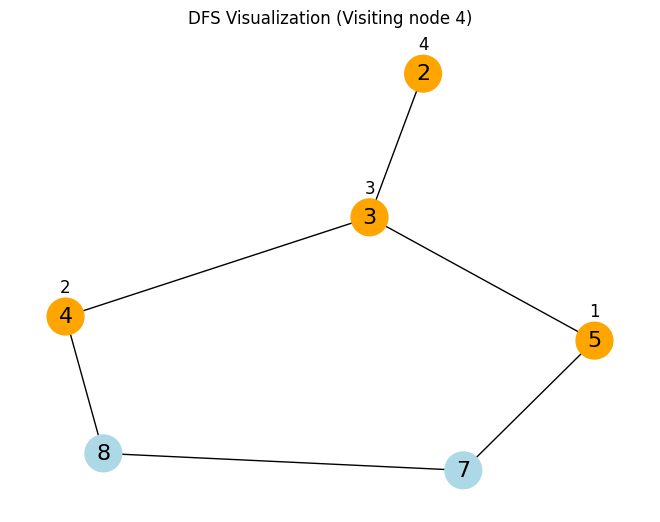

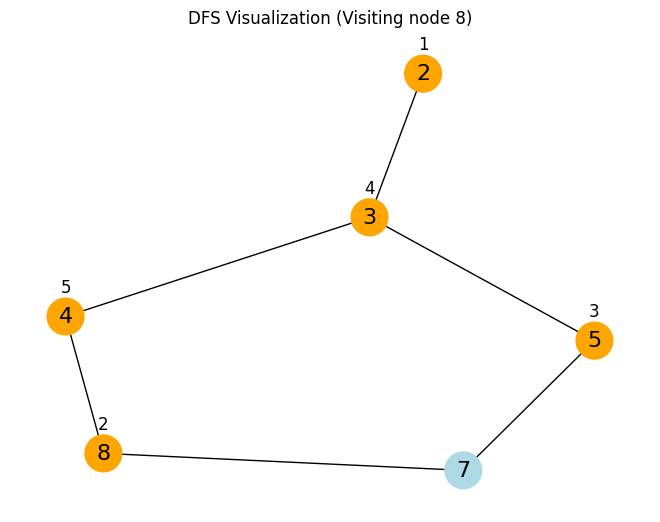

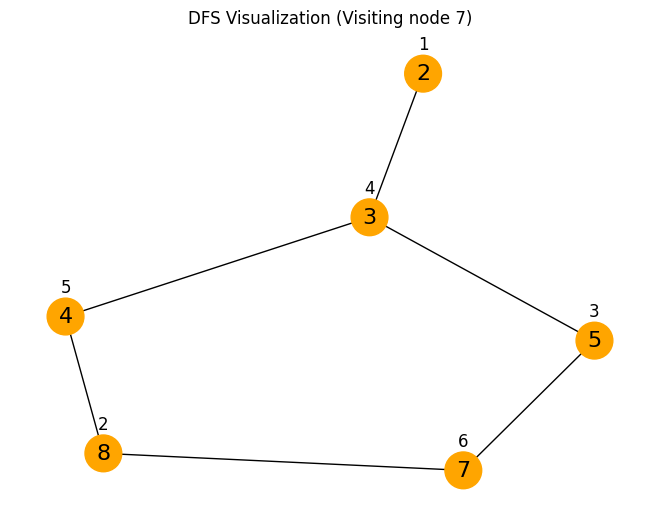


Path: 5 -> 3 -> 2 -> 4 -> 8 -> 7

DFS Traversal Steps:
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|--------------:|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
|  1 |              3 |             5 | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
|  2 |              2 |             3 | 7 4     | 5 3 2             |   3 | 3   | -   | 3   | -   | -   |
|  3 |              4 |             3 | 7       | 5 4 3 2           |   4 | 4   | -   | 4   | 4   | -   |
|  4 |              8 |             4 | 7       | 2 8 5 3 4         |   5 | 5   | -   | 5   | 5   | 5   |
|  5 |              7 |             5 |         | 2 8 5 3 4 7       |   6 | 6   | 6   | 6   | 6   | 6   |


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

# Create a graph using NetworkX
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

def dfs_visualization(graph, start):
    visited = set()  # Set for visited nodes
    stack = [(start, None)]  # Initialize a stack with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node
    plt.figure(figsize=(6, 5))

    pos = nx.spring_layout(G)  # Positioning of nodes
    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in G.nodes()}

    while stack:  # Loop to visit each node
        current_node, parent_node = stack.pop()
        if current_node not in visited:
            visited.add(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Color nodes: orange for visited, light blue for not visited
            colors = ['orange' if node in visited else 'lightblue' for node in G.nodes()]

            # Draw the graph
            nx.draw(G, pos, with_labels=True, node_color=colors, node_size=700, font_size=16)

            # Annotate the visited node with its visit number
            for v in visited:
                x, y = pos[v]
                plt.text(x, y + 0.1, str(list(visited).index(v) + 1), fontsize=12, ha='center', color='black')

            plt.title(f"DFS Visualization (Visiting node {current_node})")
            plt.pause(1)  # Pause to visualize the current state

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'STACK': ' '.join([node for node, _ in stack]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            # Push unvisited neighbours onto the stack
            for neighbour in reversed(graph[current_node]):
                if neighbour not in visited:
                    stack.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nDFS Traversal Steps:")
    print(df.to_markdown())  # Convert the DataFrame to a Markdown table

    plt.show()

# Driver Code
print("Following is the Depth-First Search")
dfs_visualization(graph, '5')  # Function calling

In [8]:
import pandas as pd

# Define the graph
graph = {
    '5': ['3', '7'],
    '3': ['2', '4'],
    '7': ['8'],
    '2': [],
    '4': ['8'],
    '8': [],
}

def dfs_visualization(graph, start):
    visited = set()  # Set for visited nodes
    stack = [(start, None)]  # Initialize a stack with (node, parent)
    path = []  # Track the path
    parent_map = {}  # Map to track parents of each node

    visit_count = 0  # Counter for visitation order

    # Initialize the table components
    steps = []
    statuses = {node: [] for node in graph.keys()}

    while stack:  # Loop to visit each node
        current_node, parent_node = stack.pop()
        if current_node not in visited:
            visited.add(current_node)
            path.append(current_node)
            parent_map[current_node] = parent_node
            visit_count += 1  # Increment the visit count

            # Update the table components
            step_info = {
                'Current Node': current_node,
                'Parent Node': parent_node,
                'STACK': ' '.join([node for node, _ in stack]),
                'Processed Nodes': ' '.join(visited)
            }
            steps.append(step_info)
            for node in statuses:
                statuses[node].append(visit_count if node in visited else '-')

            # Push unvisited neighbours onto the stack
            for neighbour in reversed(graph[current_node]):
                if neighbour not in visited:
                    stack.append((neighbour, current_node))

    # Create the table
    df = pd.DataFrame(steps)
    for node, status in statuses.items():
        df[node] = status

    print("\nPath:", " -> ".join(path))
    print("\nDFS Traversal Steps:")
    print(df.to_markdown())  # Convert the DataFrame to a Markdown table

# Driver Code
print("Following is the Depth-First Search")
dfs_visualization(graph, '5')  # Function calling

Following is the Depth-First Search

Path: 5 -> 3 -> 2 -> 4 -> 8 -> 7

DFS Traversal Steps:
|    |   Current Node |   Parent Node | STACK   | Processed Nodes   |   5 | 3   | 7   | 2   | 4   | 8   |
|---:|---------------:|--------------:|:--------|:------------------|----:|:----|:----|:----|:----|:----|
|  0 |              5 |               |         | 5                 |   1 | -   | -   | -   | -   | -   |
|  1 |              3 |             5 | 7       | 5 3               |   2 | 2   | -   | -   | -   | -   |
|  2 |              2 |             3 | 7 4     | 5 3 2             |   3 | 3   | -   | 3   | -   | -   |
|  3 |              4 |             3 | 7       | 5 4 3 2           |   4 | 4   | -   | 4   | 4   | -   |
|  4 |              8 |             4 | 7       | 2 8 5 3 4         |   5 | 5   | -   | 5   | 5   | 5   |
|  5 |              7 |             5 |         | 2 8 5 3 4 7       |   6 | 6   | 6   | 6   | 6   | 6   |
